In [7]:
#auto arima
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option("plotting.backend", "pandas_bokeh")

Loading BokehJS ...

In [3]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima

In [14]:
uber = pd.read_csv('../uber_data.csv',parse_dates= True, index_col = ['pickup_dt'])

In [15]:
uber_man = uber[uber['borough'] == 'Manhattan']
uber_man.head()

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
pickup_dt,,,,,,,,,,,,
2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2015-01-01 02:00:00,Manhattan,4345,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
2015-01-01 03:00:00,Manhattan,4577,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,Y
2015-01-01 04:00:00,Manhattan,3003,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,Y
2015-01-01 05:00:00,Manhattan,1313,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,Y


In [18]:
uber_man = uber_man[['pickups']]
uber_man.plot()

Figure(id='1788', ...)

In [19]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(uber_man)

(0.01, False)

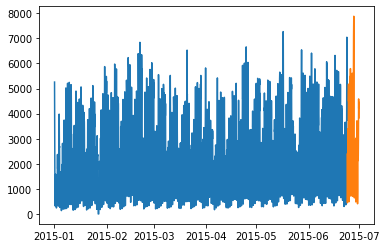

In [35]:
import matplotlib.pyplot as plt
train = uber_man[:4175]
test = uber_man[-168:]
#test.columns = ['test']

#pd.concat([train,test]).plot()
plt.plot(train)
plt.plot(test)

In [55]:
arima_model = auto_arima(train,start_p=4,d=1,start_q=0,max_p=7,max_d=7,max_q=4,start_P=4,
                        D=1,start_Q=0,max_P=7,max_D=4,max_Q=4,m=12,seasonal= True,
                        trace=True,supress_warning= True,stepwise= True,n_fits=50)

Performing stepwise search to minimize aic


KeyboardInterrupt: 

In [38]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 4175
Model:             SARIMAX(3, 1, 0)x(3, 1, 0, 12)   Log Likelihood              -30261.116
Date:                            Mon, 12 Oct 2020   AIC                          60536.232
Time:                                    17:53:07   BIC                          60580.568
Sample:                                         0   HQIC                         60551.916
                                           - 4175                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5380      0.011     48.037      0.000       0.516       0.560
ar.L2         -0.2101      0.012    -17.002      0.000      -0.234      -0.186
ar.L3          0.0418      0.012      3.530      0.000       0.019       0.065
ar.S.L12      -0.9001      0.014    -62.132      0.000      -0.928      -0.872
ar.S.L24      -0.2453      0.018    -13.548      0.000      -0.281      -0.210
ar.S.L36      -0.1885      0.013    -14.698      0.000      -0.214      -0.163
sigma2      1.204e+05   1622.813     74.205      0.000    1.17e+05    1.24e+05
===================================================================================
Ljung-Box (Q):                      793.05   Jarque-Bera (JB):              5171.32
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
preds = pd.DataFrame(arima_model.predict(n_periods = 168),index= test.index)
preds.columns = ['prediction']
preds

,prediction
pickup_dt,
2015-06-24 00:00:00,2645.377971
2015-06-24 01:00:00,1966.753149
2015-06-24 02:00:00,1647.095629
2015-06-24 03:00:00,1501.725575
2015-06-24 04:00:00,1537.508935
...,...
2015-06-30 19:00:00,9183.201904
2015-06-30 20:00:00,8908.560194
2015-06-30 21:00:00,8689.585830


In [40]:
def smape_perso(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [50]:
smape_perso(np.ravel(test['pickups']),np.ravel(preds['prediction']))

70.08728164064783

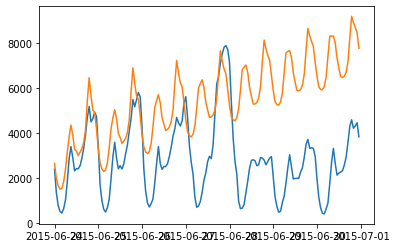

In [54]:

plt.plot(test)
plt.plot(preds)